<a href="https://colab.research.google.com/github/mrterranova/mec2-projects/blob/Student-MLE-MiniProject-Trees-And-Forests/Student_MLE_MiniProject_Trees_and_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Trees and Forests

In this mini-project you'll be introduced to some fundamental concepts in machine learning: **Decision Trees**, **Random Forests**, **Boosting**, and **Bagging**. These techniques play a crucial role in building powerful and versatile machine learning models that can be applied to a wide range of tasks, from classification to regression.

## Decision Trees

Decision Trees are intuitive models that mimic human decision-making processes. Just like answering a series of questions to reach a conclusion, decision trees segment data based on a sequence of if-else questions. They partition the feature space into regions and assign a label to each region. Decision trees are particularly helpful in understanding the decision-making process behind predictions.

## Random Forests

Random Forests are an ensemble method that combines multiple decision trees to create a more robust and accurate model. Each tree in a random forest is trained on a random subset of the data with replacement (bootstrapping), and these trees are allowed to make individual predictions. The final prediction is determined through majority voting (classification) or averaging (regression) of the predictions made by the individual trees. Random Forests are known for their ability to handle noisy data, reduce overfitting, and capture complex relationships.

## Bagging: Bootstrap Aggregating

Bagging, short for Bootstrap Aggregating, is the technique behind Random Forests. It involves training multiple models on bootstrapped subsets of the training data. Bagging reduces the variance of the model by averaging out the noise and errors present in individual models. While Random Forests are a specific application of bagging to decision trees, bagging can also be applied to other base models.

## Boosting

Boosting is another ensemble technique that focuses on building a strong predictor by sequentially training multiple weak learners (often shallow decision trees). Boosting assigns weights to training instances, focusing more on those that the previous models misclassified. This iterative process helps the model correct its mistakes and improve its performance over time. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

In this mini-project, we will:

1. Implement and visualize decision trees using the scikit-learn library.
2. Explore the power of random forests and understand feature importance.
3. Dive into the boosting technique with AdaBoost to enhance model accuracy.

For this mini-project we'll be using the [Breast Cancer Wisconsin (Diagnostic) dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). First, let's import all the libraries we'll be using.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Here are your tasks:

1. Use [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) to load the Breast Cancer Wisconsin dataset as a Pandas dataframe.
2. Split the dataset into training and test sets.
3. Display the first five rows of data and make sure everything looks ok. You should have already explored the data a bit in the logistic regression mini-project so there's no need to conduct further EDA.  

In [2]:
# Load the Breast Cancer Wisconsin dataset

df = pd.DataFrame(load_breast_cancer(as_frame=True).data)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Familiarizing myself with the data
df.shape


(569, 30)

We can see that the data has 30 columns and 569 rows.

In [63]:
# Familiarizing myself with the data - recommended in video to count values for my data to see if the sample amount is enough
df['target'] = load_breast_cancer(as_frame=True).target
target_counts = df['target'].value_counts()
print(f'Value counts of no breast cancer found: {target_counts[0]}')
print(f'Value counts of breast cancer found: {target_counts[1]}\n\n')
print(f'Count of no breast cancer found: {target_counts[0]/len(df)*100:.2f}%')
print(f'Count of breast cancer found: {target_counts[1]/len(df)*100:.2f}%')

Value counts of no breast cancer found: 212
Value counts of breast cancer found: 357


Count of no breast cancer found: 37.26%
Count of breast cancer found: 62.74%


In [5]:
# Split the dataset into training and testing sets
df_features = df.drop('target', axis=1)
df_targets = df['target']
X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, test_size=0.2, stratify=df_targets, random_state=42)

In [69]:
# Display first 5 rows
# Training set - feature data
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


In [70]:
# Display first 5 rows
# Test set - feature data
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
256,19.55,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,0.1893,0.06232,...,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.4251,0.19410,0.2818,0.10050
428,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.0458,0.04044,0.2383,0.07083
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.06759,0.2275,0.07237,...,16.01,32.94,106.00,788.0,0.1794,0.39660,0.3381,0.15210,0.3651,0.11830
363,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.13,25.45,117.20,1009.0,0.1338,0.16790,0.1663,0.09123,0.2394,0.06469
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.21130,0.4107,0.22160,0.2060,0.07115


Let's start by diving into decision trees. At a high level, decision trees are a machine learning algorithm used for both classification and regression tasks. They model decisions and decision-making processes by breaking down a complex decision into a sequence of simpler decisions or questions. Each decision leads to one of several possible outcomes, eventually leading to a prediction or classification.

**Decision trees are built out of the following components:**
- **Nodes:** Decision trees consist of nodes. The initial node is the root node, and the final nodes are called leaf nodes.
- **Edges:** Edges connect nodes and represent the decision outcomes.
- **Attributes/Features:** Each node involves a decision based on a specific attribute or feature.
- **Splitting:** At each node, the dataset is partitioned into subsets based on an attribute's values.
- **Leaf Nodes:** These nodes represent the final predicted class or value.

**How Decision Trees Work:**
1. **Selecting the Best Feature:** Decision trees start with the root node and select the feature that best separates the data.
2. **Splitting:** The selected feature is used to split the data into subsets at each internal node.
3. **Repeating:** The process continues recursively for each subset, selecting the best feature at each node.
4. **Leaf Nodes:** The process stops when a certain stopping criterion is met, or when all instances at a node belong to the same class.

**Advantages:**
1. **Interpretability:** Decision trees are easy to understand and interpret. The path from the root to a leaf node can be visualized as a sequence of decisions.
2. **Handles Numerical and Categorical Data:** Decision trees can handle both numerical and categorical data, making them versatile.
3. **Non-Linearity:** They can capture non-linear relationships between features and the target variable.
4. **Feature Importance:** Decision trees provide a measure of feature importance, helping in feature selection.

**Challenges and Considerations:**
1. **Overfitting:** Decision trees can create overly complex models that fit the training data too closely, leading to poor generalization.
2. **Instability:** Small changes in the data can lead to different trees, which can make the model unstable.
3. **Bias towards Majority Class:** In classification tasks, decision trees tend to favor the majority class if classes are imbalanced.

**Improvements:**
1. **Pruning:** Pruning is the process of removing branches that do not improve the model's performance on validation data, reducing overfitting.
2. **Ensemble Methods:** Random Forests and Gradient Boosting Trees are ensemble methods that combine multiple decision trees to improve performance.

There are a number of different metrics used to determine how to split a node in a decision tree. The Gini impurity is a popular criterion used in decision tree algorithms. It measures the degree of impurity in a dataset, where lower values indicate more pure subsets of data. In the context of decision trees, the Gini impurity is used to assess how often a randomly chosen element would be misclassified if it were randomly assigned to a class based on the distribution of class labels in a subset. The Gini impurity ranges between 0 (pure node, all instances belong to a single class) and 0.5 (impure node, instances are evenly distributed across classes).

Here are your tasks:

1. Use Scikit-Learn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) to fit a model on the training data.
2. Visualize the resulting tree using [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).
3. Iterate on the first two steps by trying different inputs to the decision tree classifier. What happens if you change the max depth? How about the maximum number of lead nodes? From the visualization, make sure you're able to understand how to descend the decision tree to arrive at a prediction.

In [40]:
# Create a Decision Tree model
# Initialize the classifier - see variations in max_leaf_nodes
dt_model_4_mln = DecisionTreeClassifier(max_leaf_nodes=4, random_state=42)
dt_model_6_mln = DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)
dt_model_8_mln = DecisionTreeClassifier(max_leaf_nodes=8, random_state=42)
dt_model_10_mln = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
dt_model_20_mln = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

# Train the model - variations in max_leaf_nodes
dt_model_4_mln.fit(X_train, y_train)
dt_model_6_mln.fit(X_train, y_train)
dt_model_8_mln.fit(X_train, y_train)
dt_model_10_mln.fit(X_train, y_train)
dt_model_20_mln.fit(X_train, y_train)


# Initialize the classifier - see variations in max_depth
dt_model_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_6 = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model_10 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model_15 = DecisionTreeClassifier(max_depth=15, random_state=42)
dt_model_20 = DecisionTreeClassifier(max_depth=20, random_state=42)

# Train the model - variations in max_depth
dt_model_2.fit(X_train, y_train)
dt_model_3.fit(X_train, y_train)
dt_model_4.fit(X_train, y_train)
dt_model_5.fit(X_train, y_train)
dt_model_6.fit(X_train, y_train)
dt_model_10.fit(X_train, y_train)
dt_model_15.fit(X_train, y_train)
dt_model_20.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [41]:
# Predict on test data - variations in max_leaf_nodes
y_pred_4_mln = dt_model_4_mln.predict(X_test)
y_pred_6_mln = dt_model_6_mln.predict(X_test)
y_pred_8_mln = dt_model_8_mln.predict(X_test)
y_pred_10_mln = dt_model_10_mln.predict(X_test)
y_pred_20_mln = dt_model_20_mln.predict(X_test)

accuracy_4_mln = accuracy_score(y_test, y_pred_4_mln)
accuracy_6_mln = accuracy_score(y_test, y_pred_6_mln)
accuracy_8_mln = accuracy_score(y_test, y_pred_8_mln)
accuracy_10_mln = accuracy_score(y_test, y_pred_10_mln)
accuracy_20_mln = accuracy_score(y_test, y_pred_20_mln)

print(f'Accuracy for 4 Leaf Nodes: {accuracy_4_mln:.2f}')
print(f'Accuracy for 6 Leaf Nodes: {accuracy_6_mln:.2f}')
print(f'Accuracy for 8 Leaf Nodes: {accuracy_8_mln:.2f}')
print(f'Accuracy for 10 Leaf Nodes: {accuracy_10_mln:.2f}')
print(f'Accuracy for 20 Leaf Nodes: {accuracy_20_mln:.2f}')

# Predict on test data - variations in max_depth
y_pred_2 = dt_model_2.predict(X_test)
y_pred_3 = dt_model_3.predict(X_test)
y_pred_4 = dt_model_4.predict(X_test)
y_pred_5 = dt_model_5.predict(X_test)
y_pred_6 = dt_model_6.predict(X_test)
y_pred_10 = dt_model_10.predict(X_test)
y_pred_15 = dt_model_15.predict(X_test)
y_pred_20 = dt_model_20.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_3 = accuracy_score(y_test, y_pred_3)
accuracy_4 = accuracy_score(y_test, y_pred_4)
accuracy_5 = accuracy_score(y_test, y_pred_5)
accuracy_6 = accuracy_score(y_test, y_pred_6)
accuracy_10 = accuracy_score(y_test, y_pred_10)
accuracy_15 = accuracy_score(y_test, y_pred_15)
accuracy_20 = accuracy_score(y_test, y_pred_20)

print(f'Accuracy for Depth of 2: {accuracy_2:.2f}')
print(f'Accuracy for Depth of 3: {accuracy_3:.2f}')
print(f'Accuracy for Depth of 4: {accuracy_4:.2f}')
print(f'Accuracy for Depth of 5: {accuracy_5:.2f}')
print(f'Accuracy for Depth of 6: {accuracy_6:.2f}')
print(f'Accuracy for Depth of 10: {accuracy_10:.2f}')
print(f'Accuracy for Depth of 15: {accuracy_15:.2f}')
print(f'Accuracy for Depth of 20: {accuracy_20:.2f}')


Accuracy for 4 Leaf Nodes: 0.89
Accuracy for 6 Leaf Nodes: 0.94
Accuracy for 8 Leaf Nodes: 0.94
Accuracy for 10 Leaf Nodes: 0.94
Accuracy for 20 Leaf Nodes: 0.89
Accuracy for Depth of 2: 0.89
Accuracy for Depth of 3: 0.94
Accuracy for Depth of 4: 0.94
Accuracy for Depth of 5: 0.92
Accuracy for Depth of 6: 0.91
Accuracy for Depth of 10: 0.91
Accuracy for Depth of 15: 0.91
Accuracy for Depth of 20: 0.91


______________

# **Questions: What happens if you change the max depth?**

When you change max depth in a decision tree, you are adding layers to your tree, or different levels in which a true/false decision (splits in tree) will be made about the data. When you keep the max depth at a low level, then you might run the risk of underfitting your data and your model will show high bias. This means that your model will make assumptions about the data and disreguard some of the data complexity. If you make your max depth deeper, then you might run the risk of overfitting your data which will show high variance. This means that your model will better fit the data, but will split at minute differences that might not be important.

Above we see that the max depth best fits the model when it is 3 or 4. Both 3 and 4 are accurate up to ~94%. To accomodate for the balance between bias variance, 3 is the better option as this contains less splits and equal accuracy to 4 for max-depth.

# **How about the maximum number of leaf nodes?**

When you change the max number of leaf nodes in a decision tree, again you are impacting the performance of the decision tree based on the number of splits. Leaf nodes are the terminal nodes in a decision tree, in other words, they are the ending nodes without any children. Increasing the number of leaf nodes will increase the number of splits in the decision tree. This will make the model more complex which will lead to overfitting your model. However, you run the risk of underfitting your model if there are not enough terminal nodes.

Above we see that the max number of leaf nodes best fits the model when they are 6, 8, 10. 6, 8, and 10 are accurate up to ~94%. But once again we must be concerned with the bias-variance tradeoff. Therefore, we want lesser terminal nodes (meaning lesser splits/decisions) in the model. This way we can be sure that we are balancing bias and variance in our model. To accomodate for the tradeoff, 6 is the better option as this contains less terminal nodes which are less splits.


Both max number of leaf nodes and max depth are ways of approaching the bias-variance tradeoff issue. Max depth is a variable that begins at the root and is more concerned with the splits or levels from the root to the terminal node. While max number of leaf nodes counts the final/terminal nodes and creates splits to accomodate the cound of the terminal nodes.

Please see **continued** section below to understand using visuals...
____________


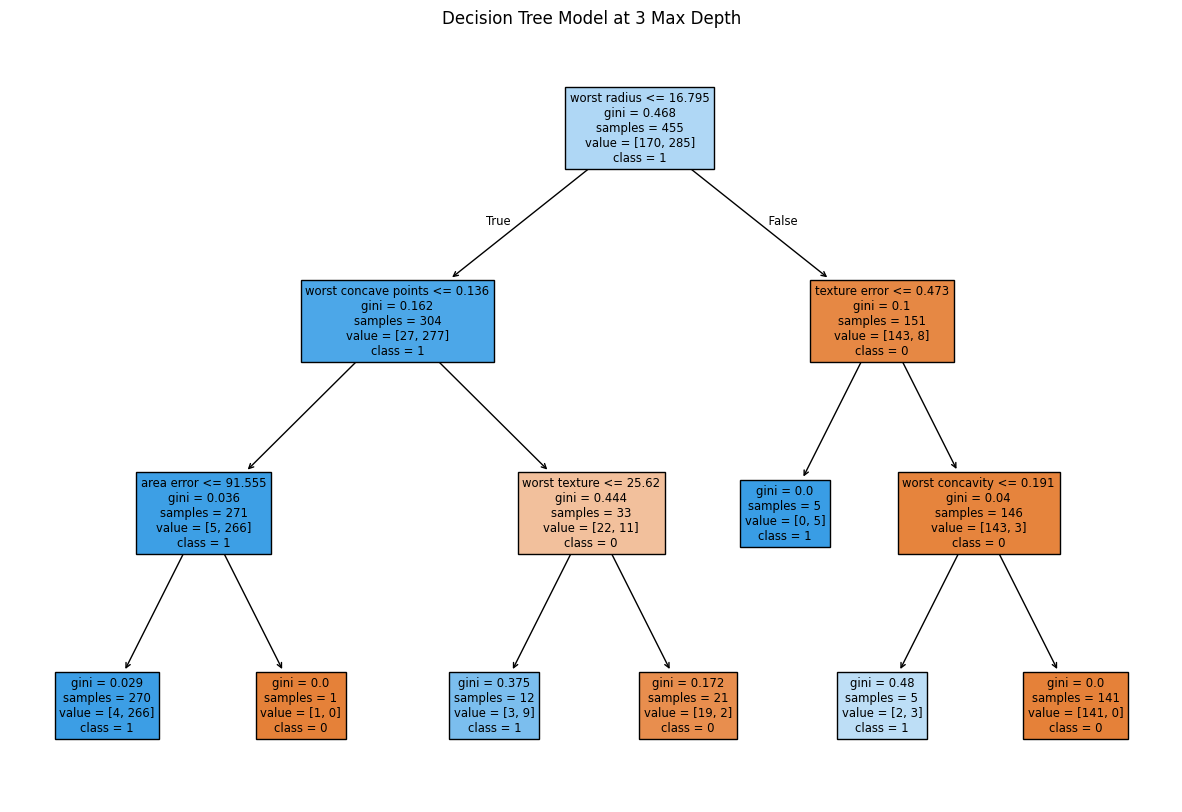

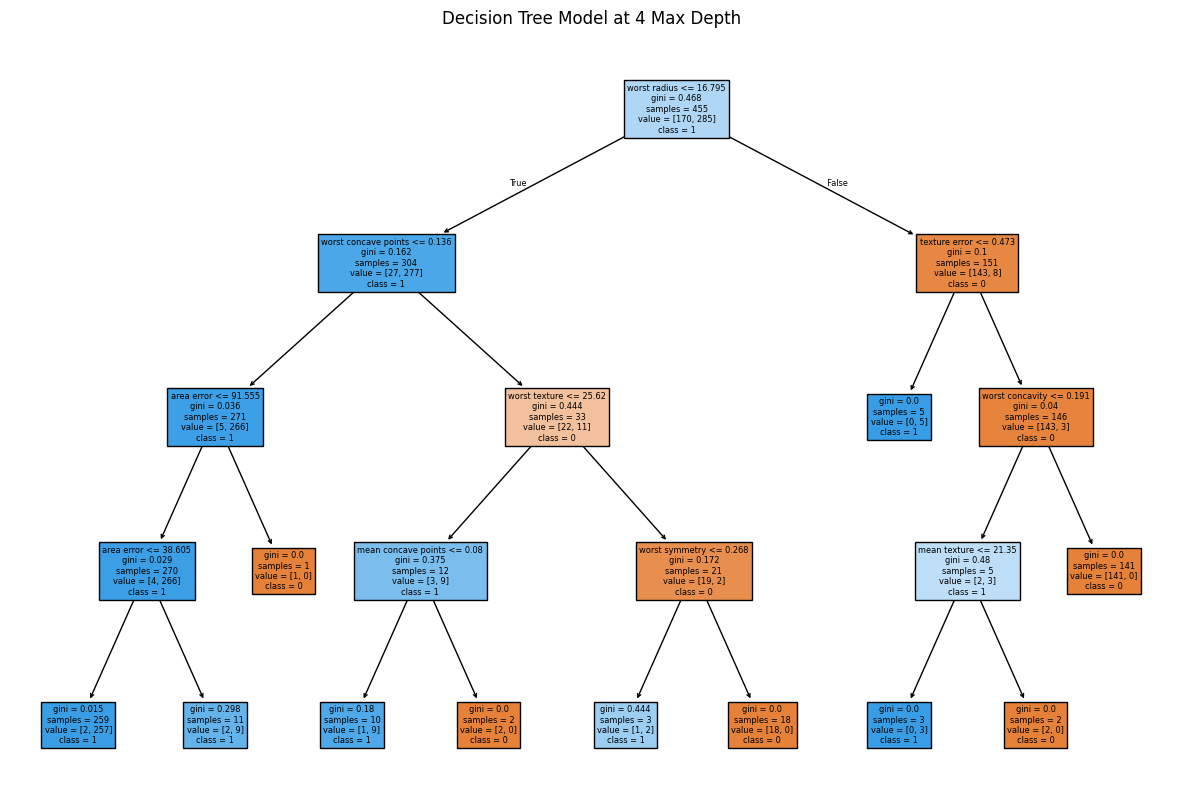

In [48]:
plt.figure(figsize=(15,10))
plot_tree(dt_model_3, feature_names=df_features.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Model at 3 Max Depth")
plt.show()

plt.figure(figsize=(15,10))
plot_tree(dt_model_4, feature_names=df_features.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Model at 4 Max Depth")
plt.show()

# **(ANSWER CONTINUED MAX DEPTH...)**

Above we have varying models of the decision tree based on the max depth. Since 3 and 4 both contain the highest accuracy, we will look at visuals for these 2 variations.

We see that max_depth for 3 and 4 respectively have 3 and 4 levels from the root in the tree. We can see that 3 has 7 terminal leaf nodes occuring from 6 decision/splits in the tree. We can see that 4 has 11 terminal leaf nodes occuring from 10 decisions/splits in the tree.

We can conclude that if 3 and 4 have the same highest accuracy of the model, then 3 has less splits and therefore contains more significant splits of the data than 4.

Therefore, if we use max_depth for this dataset, it should equal 3.

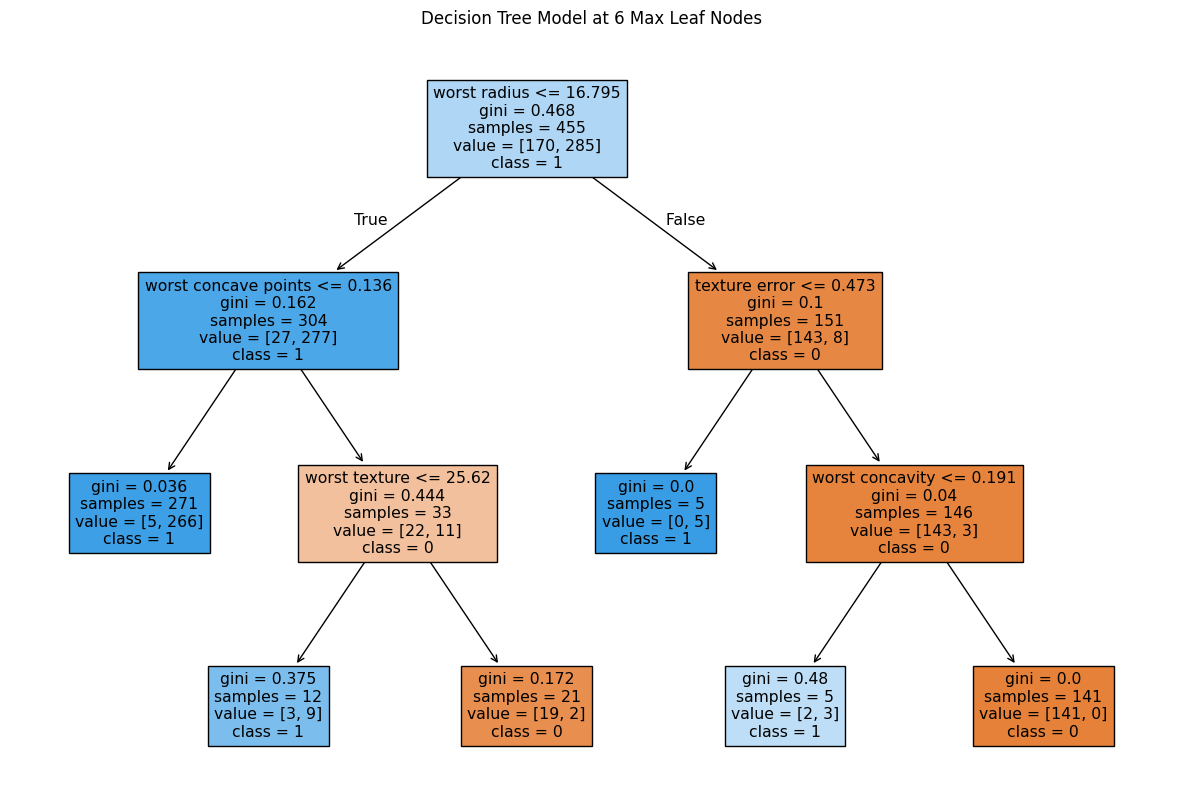

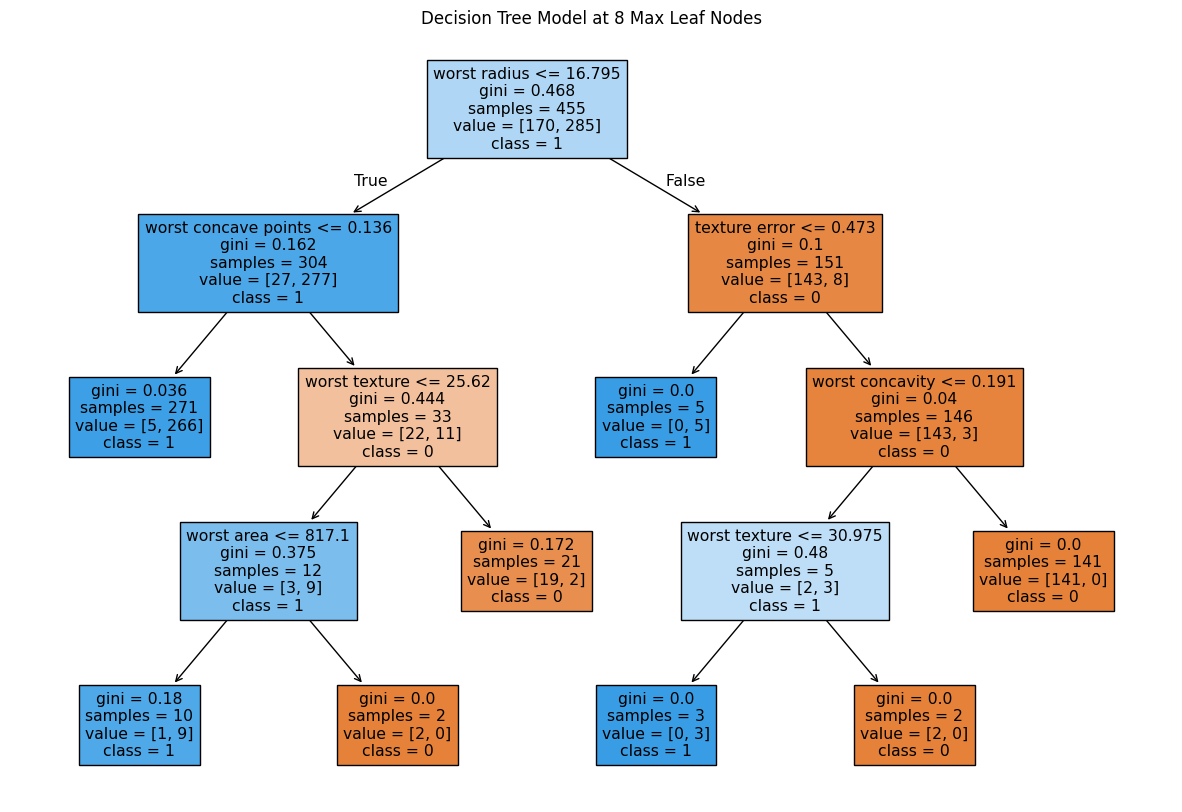

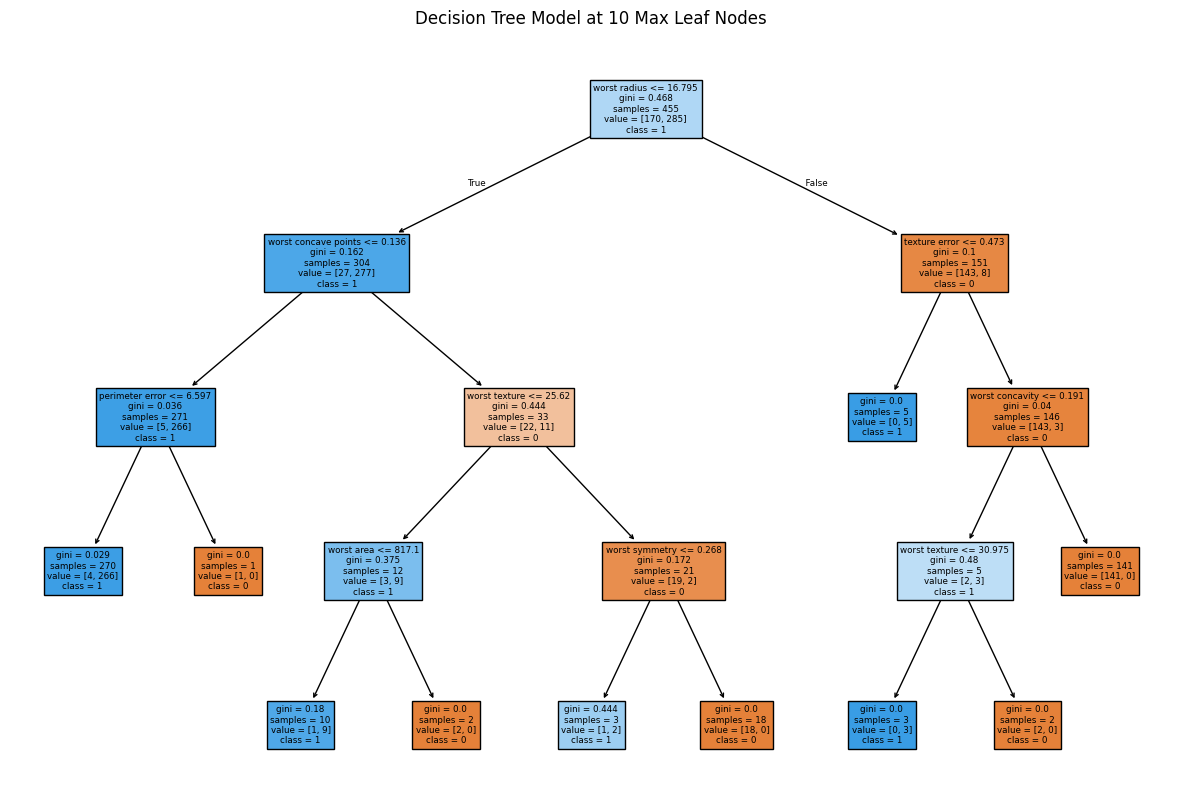

In [49]:
# Visualize the Decision Tree
plt.figure(figsize=(15,10))
plot_tree(dt_model_6_mln, feature_names=df_features.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Model at 6 Max Leaf Nodes")
plt.show()

plt.figure(figsize=(15,10))
plot_tree(dt_model_8_mln, feature_names=df_features.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Model at 8 Max Leaf Nodes")
plt.show()

plt.figure(figsize=(15,10))
plot_tree(dt_model_10_mln, feature_names=df_features.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Model at 10 Max Leaf Nodes")
plt.show()

_____________

# **(ANSWER CONTINUED MAX NUMBER OF LEAF NODES...)**

Above we have varying models of the decision tree based on the max number of leaf nodes or terminal leaf nodes. Since 6, 8, and 10 all contain the highest accuracy, we will look at visuals for these 3 variations.

We see that max_leaf_nodes or the terminal leaf nodes for 6, 8 and 10 respectively have terminal node counts at 6, 8, 10. We can see that 6 has 5 decisions or splits from root to terminal node and has a max_depth of 3. We can see that 8 has 6 decisions or splits from root to terminal node and has a max_depth of 4. We can see that 10 has 8 decisions or splits from root to terminal node and has a max_depth of 4.

We can conclude that 10 and 8 do not vary greatly in terms of depth, meaning that 10 probably contains splits that are not significant to the data and the learning model should not split on insigificant differences.

Therefore, we are left with 6 and 8. But seeing that 6 is more shallow and contains less splits with the same accuracy as 8, the splits for 6 are more significant than those in 8.

We can conclude that for this dataset, we should use max_leaf_node=6 if we train our decision tree model.
___________________

Accuracy for Best Fit: 93.86%


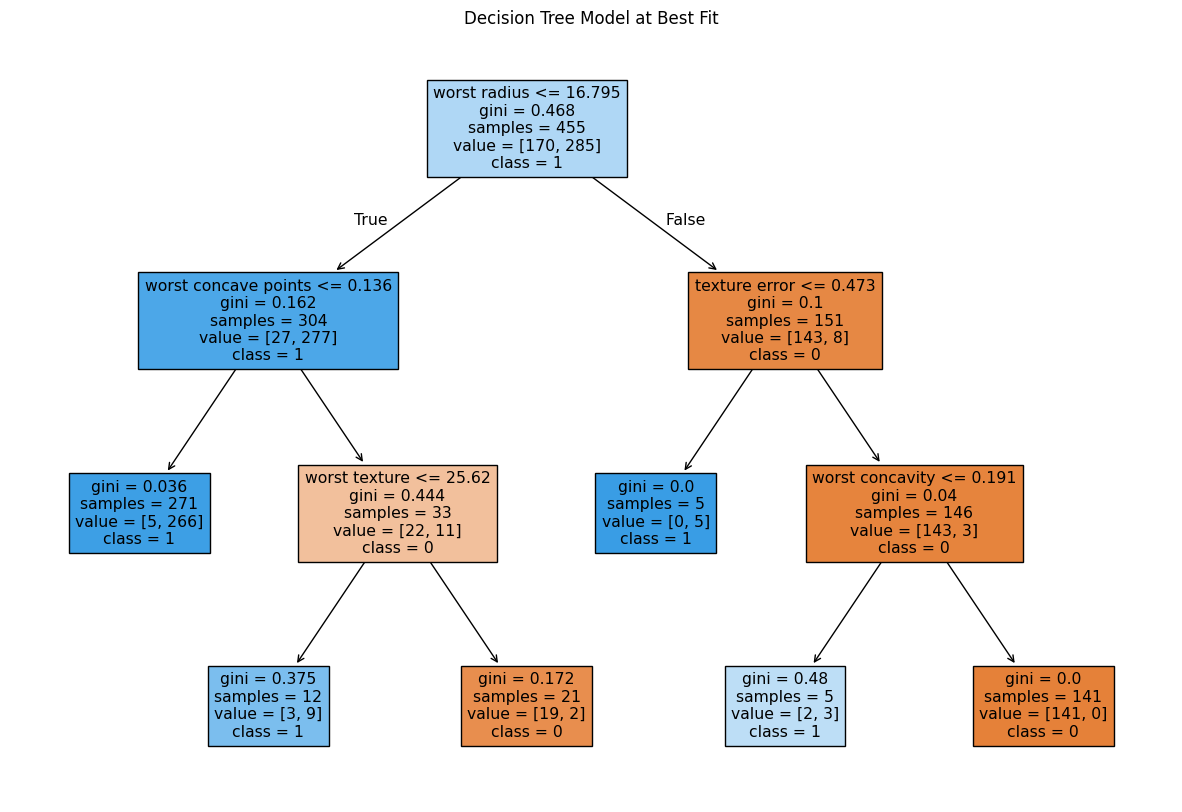

In [53]:
# Running the data with max_depth=3 and max_leaf_node=6

dt_model_best_fit = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=6, random_state=42)
dt_model_best_fit.fit(X_train, y_train)

y_pred_best_fit = dt_model_best_fit.predict(X_test)

accuracy_best_fit = accuracy_score(y_test, y_pred_best_fit)
print(f'Accuracy for Best Fit: {accuracy_best_fit*100:.2f}%')

plt.figure(figsize=(15,10))
plot_tree(dt_model_best_fit, feature_names=df_features.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Model at Best Fit")
plt.show()


Random Forests are an extension of decision trees that leverage the power of ensemble learning to improve predictive accuracy and robustness. Instead of relying on a single decision tree, Random Forests combine multiple decision trees to make more accurate and stable predictions. Let's walk through the steps of going from decision trees to Random Forests:

**Step 1: Building Individual Decision Trees**
1. **Decision Tree Construction:** Start by building multiple individual decision trees. Each tree is trained on a bootstrapped subset of the training data, meaning that each tree sees a slightly different version of the data due to random sampling with replacement.
2. **Feature Selection:** At each node of a decision tree, only a random subset of features is considered for splitting. This introduces randomness and diversity among the trees.

**Step 2: Combining Trees in a Random Forest**
1. **Predictions:** When you need to make a prediction using the Random Forest, each individual tree in the forest makes a prediction.
2. **Majority Voting (Classification) or Averaging (Regression):** In the case of classification, the class that the majority of trees predict becomes the final prediction. In the case of regression, the average of predictions from all trees is taken as the final prediction.

**Benefits of Random Forests:**
1. **Reduced Overfitting:** The ensemble nature of Random Forests helps reduce overfitting. The diversity among the trees reduces the risk of capturing noise in the data.
2. **Feature Importance:** Random Forests can provide an estimate of feature importance by tracking how much each feature contributes to improving the purity of the nodes.
3. **Handles Noisy Data:** Random Forests can handle noisy and irrelevant features more effectively than individual decision trees.
4. **Parallelization:** Training decision trees can be parallelized since they are independent of each other, which speeds up the training process.

Here are your tasks:

1. Use your training data to train a Random Forest using [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
2. Extract the feature importances from the trained model.
3. Print the feature importances from largest to smallest.

In [78]:
# Train random forest model

# test with different tree estimators
rf_model_20 = RandomForestClassifier(n_estimators=20, random_state=42)

rf_model_30 = RandomForestClassifier(n_estimators=30, random_state=42)
rf_model_40 = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model_50 = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model_60 = RandomForestClassifier(n_estimators=60, random_state=42)
rf_model_100 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_20.fit(X_train, y_train)
rf_model_30.fit(X_train, y_train)
rf_model_40.fit(X_train, y_train)
rf_model_50.fit(X_train, y_train)
rf_model_60.fit(X_train, y_train)
rf_model_100.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Extract feature importances
importances_20 = rf_model_20.feature_importances_
importances_30 = rf_model_30.feature_importances_
importances_40 = rf_model_40.feature_importances_
importances_50 = rf_model_50.feature_importances_
importances_60 = rf_model_60.feature_importances_
importances_100 = rf_model_100.feature_importances_
print('Importance at 20 trees:', importances_20)
print('Importance at 30 trees:', importances_30)
print('Importance at 40 trees:', importances_40)
print('Importance at 50 trees:', importances_50)
print('Importance at 60 trees:', importances_60)
print('Importance at 100 trees:', importances_100)

Importance at 20 trees: [0.09424665 0.00909209 0.05395764 0.04578072 0.0072941  0.02402209
 0.08766965 0.08355019 0.00533522 0.006253   0.01088485 0.01118986
 0.0050851  0.06568407 0.00144743 0.00348976 0.00201125 0.00154194
 0.00458649 0.00301016 0.1066228  0.02196698 0.07762313 0.06027038
 0.00785171 0.03118057 0.04515159 0.11260086 0.00629834 0.00430142]
Importance at 30 trees: [0.06710219 0.00746029 0.06320955 0.05518702 0.00630492 0.01648124
 0.10406978 0.10524663 0.00579786 0.00443286 0.02063495 0.00775586
 0.00666405 0.04747407 0.00236048 0.0041151  0.00173405 0.0034944
 0.00362721 0.00444484 0.08266311 0.01940276 0.0665924  0.0952143
 0.01170761 0.02803897 0.03328012 0.11416049 0.0076126  0.0037303 ]
Importance at 40 trees: [0.05353849 0.00782473 0.08211865 0.04433124 0.00493462 0.02353317
 0.08165382 0.09700814 0.00711263 0.00444726 0.01836119 0.00706775
 0.01302067 0.04605248 0.00224353 0.00597972 0.00421973 0.0037345
 0.00316561 0.00437664 0.10077183 0.01912861 0.06176592 0.

In [80]:
# Print feature importance
feature_importances_20 = pd.Series(importances_20, index=df_features.columns)
sorted_feature_vals_20 = feature_importances_20.sort_values(ascending=False)
print('\nSorted all Feature Vals at 20 Trees:\n', sorted_feature_vals_20)

feature_importances_30 = pd.Series(importances_30, index=df_features.columns)
sorted_feature_vals_30 = feature_importances_30.sort_values(ascending=False)
print('\nSorted top 5 Feature Vals at 30 Trees:\n', sorted_feature_vals_30[:5])

feature_importances_40 = pd.Series(importances_40, index=df_features.columns)
sorted_feature_vals_40 = feature_importances_40.sort_values(ascending=False)
print('\nSorted top 5 Feature Vals at 40 Trees:\n', sorted_feature_vals_40[:5])

feature_importances_50 = pd.Series(importances_50, index=df_features.columns)
sorted_feature_vals_50 = feature_importances_50.sort_values(ascending=False)
print('\nSorted top 5 Feature Vals at 50 Trees:\n', sorted_feature_vals_50[:5])

feature_importances_60 = pd.Series(importances_60, index=df_features.columns)
sorted_feature_vals_60 = feature_importances_60.sort_values(ascending=False)
print('\nSorted top 5 Feature Vals at 60 Trees:\n', sorted_feature_vals_60[:5])

feature_importances_100 = pd.Series(importances_100, index=df_features.columns)
sorted_feature_vals_100 = feature_importances_100.sort_values(ascending=False)
print('\nSorted top 5 Feature Vals at 100 Trees:\n', sorted_feature_vals_100[:5])


Sorted all Feature Vals at 20 Trees:
 worst concave points       0.112601
worst radius               0.106623
mean radius                0.094247
mean concavity             0.087670
mean concave points        0.083550
worst perimeter            0.077623
area error                 0.065684
worst area                 0.060270
mean perimeter             0.053958
mean area                  0.045781
worst concavity            0.045152
worst compactness          0.031181
mean compactness           0.024022
worst texture              0.021967
texture error              0.011190
radius error               0.010885
mean texture               0.009092
worst smoothness           0.007852
mean smoothness            0.007294
worst symmetry             0.006298
mean fractal dimension     0.006253
mean symmetry              0.005335
perimeter error            0.005085
symmetry error             0.004586
worst fractal dimension    0.004301
compactness error          0.003490
fractal dimension error  

In [81]:
# Make predictions on the test set
y_pred_20 = rf_model_20.predict(X_test)
y_pred_30 = rf_model_30.predict(X_test)
y_pred_40 = rf_model_40.predict(X_test)
y_pred_50 = rf_model_50.predict(X_test)
y_pred_60 = rf_model_60.predict(X_test)
y_pred_100 = rf_model_100.predict(X_test)

# Calculate accuracy
accuracy_20 = accuracy_score(y_test, y_pred_20)
accuracy_30 = accuracy_score(y_test, y_pred_30)
accuracy_40 = accuracy_score(y_test, y_pred_40)
accuracy_50 = accuracy_score(y_test, y_pred_50)
accuracy_60 = accuracy_score(y_test, y_pred_60)
accuracy_100 = accuracy_score(y_test, y_pred_100)
print(f"Random Forest Model Accuracy at 20 Trees: {accuracy_20 * 100:.2f}%")
print(f"Random Forest Model Accuracy at 30 Trees: {accuracy_30 * 100:.2f}%")
print(f"Random Forest Model Accuracy at 40 Trees: {accuracy_40 * 100:.2f}%")
print(f"Random Forest Model Accuracy at 50 Trees: {accuracy_50 * 100:.2f}%")
print(f"Random Forest Model Accuracy at 60 Trees: {accuracy_60 * 100:.2f}%")
print(f"Random Forest Model Accuracy at 100 Trees: {accuracy_100 * 100:.2f}%")

Random Forest Model Accuracy at 20 Trees: 95.61%
Random Forest Model Accuracy at 30 Trees: 94.74%
Random Forest Model Accuracy at 40 Trees: 94.74%
Random Forest Model Accuracy at 50 Trees: 95.61%
Random Forest Model Accuracy at 60 Trees: 95.61%
Random Forest Model Accuracy at 100 Trees: 95.61%


_________
# Random Forest Model Analysis

Above we can see the accuracy of the Random Forest Model to use to compare with the Decision Tree Model and the AdaBoost.

The data above shows that at 20, 50, 60, and 100 trees, the accuracy is at the highest for the model. To decide which is the best fit for the dataset, we will choose from the higher tree count. In this case, 50 or 60 or 100 trees will be best. The reason for this is that a lower tree count could lead to underfitting and therefore we exempt n_estimator=20 despite that the percentage is 95.61% same as 50, 60, and 100 trees. The higher number of trees is preferable for this model, however the tradeoff is performance time.

For better performance, we will go with the most accurate model with the lowest tree count so that we can keep performance time at a minimum without worry of underfitting our model. In this case 50 trees is the most accurate measure at 95.61% based on the calculations above.

We can also determine the top 5 features of each model with different tree counts. The top 5 features found are: worst concave points, worst radius, mean concavity, worst area(except in 20 trees), and mean perimeter(except in 20 and 100). These features show up as important indicators for the presence of cancer by a majority of the models with different tree counts. Therefore, these top 5 features should be looked at for predictions of breast cancer based on the Random Forest Model.
______________


AdaBoost, short for Adaptive Boosting, is a powerful ensemble learning technique used primarily for classification tasks. It is designed to enhance the performance of weak learners (typically shallow decision trees) by combining their predictions. AdaBoost focuses on learning from the mistakes of previous models and gives more weight to misclassified instances, allowing subsequent models to correct those mistakes.

Here's an overview of how AdaBoost works:

**Step 1: Building Weak Learners (Base Models)**
1. **Initialization:** Each training instance is initially assigned equal weights.
2. **Training Weak Learners:** A series of weak learners (e.g., shallow decision trees) are trained on the data. Each weak learner tries to minimize the weighted classification error, where the weight of an instance depends on its previous misclassifications. The first weak learner is trained on the original data.

**Step 2: Weighting Instances**
1. **Calculating Error:** The weighted classification error of each weak learner is computed as the sum of weights of misclassified instances.
2. **Updating Weights:** Instances that were misclassified by the previous weak learner are given higher weights, making them more important for subsequent models. Instances that were correctly classified are given lower weights.

**Step 3: Combining Weak Learners**
1. **Predictions and Voting:** The predictions from all weak learners are combined using weighted majority voting. Weights are assigned to each weak learner based on its performance (lower error leads to higher weight).
2. **Final Prediction:** The final prediction is made by taking a weighted majority vote of the weak learners' predictions.

**Benefits of AdaBoost:**
1. **Adaptive Learning:** AdaBoost focuses on instances that were misclassified by previous models, adapting to the complexity of the data.
2. **Improves Weak Models:** Even if individual weak learners perform only slightly better than random guessing, AdaBoost can combine them to create a strong model.
3. **Reduces Overfitting:** The iterative nature of AdaBoost allows it to focus on hard-to-classify instances and improve overall generalization.

Here are your tasks:

1. Build and train an [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) on your training data using a decision tree of max depth equal to 1 as your weak learner.
2. Evaluate your decision tree, random forest, and AdaBoost models by applying [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to the test data. Which model performs the best? Experiment by changing the hyperparameters of these models.


In [82]:
# Build and train an AdaBoostClassifier on your training data.

ad_model_20_1 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=20, learning_rate=1.0, random_state=42)
ad_model_30_1 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate=1.0, random_state=42)
ad_model_40_1 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=40, learning_rate=1.0, random_state=42)
ad_model_50_1 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)

ad_model_20_2 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=20, learning_rate=1.0, random_state=42)
ad_model_30_2 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=30, learning_rate=1.0, random_state=42)
ad_model_40_2 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=40, learning_rate=1.0, random_state=42)
ad_model_50_2 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2), n_estimators=50, learning_rate=1.0, random_state=42)

ad_model_20_3 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=3), n_estimators=20, learning_rate=1.0, random_state=42)
ad_model_30_3 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=3), n_estimators=30, learning_rate=1.0, random_state=42)
ad_model_40_3 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=3), n_estimators=40, learning_rate=1.0, random_state=42)
ad_model_50_3 = AdaBoostClassifier( DecisionTreeClassifier(max_depth=3), n_estimators=50, learning_rate=1.0, random_state=42)
# Fit the model

ad_model_20_1.fit(X_train, y_train)
ad_model_30_1.fit(X_train, y_train)
ad_model_40_1.fit(X_train, y_train)
ad_model_50_1.fit(X_train, y_train)

ad_model_20_2.fit(X_train, y_train)
ad_model_30_2.fit(X_train, y_train)
ad_model_40_2.fit(X_train, y_train)
ad_model_50_2.fit(X_train, y_train)

ad_model_20_3.fit(X_train, y_train)
ad_model_30_3.fit(X_train, y_train)
ad_model_40_3.fit(X_train, y_train)
ad_model_50_3.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   random_state=42)

In [85]:
# Evaluate models

# Evaluate Model for AdaBoost at 20 trees
ad_model_20_1.fit(X_train, y_train)
predictions_20_1 = ad_model_20_1.predict(df.drop('target', axis=1))
accuracy_20_1 = accuracy_score(df_targets, predictions_20_1)
print('Accuracy for AdaBoost at 20 trees at depth 1:', accuracy_20_1)

ad_model_30_1.fit(X_train, y_train)
predictions_30_1 = ad_model_30_1.predict(df.drop('target', axis=1))
accuracy_30_1 = accuracy_score(df_targets, predictions_30_1)
print('Accuracy for AdaBoost at 30 trees at depth 1:', accuracy_30_1)

ad_model_40_1.fit(X_train, y_train)
predictions_40_1 = ad_model_40_1.predict(df.drop('target', axis=1))
accuracy_40_1 = accuracy_score(df_targets, predictions_40_1)
print('Accuracy for AdaBoost at 40 trees at depth 1:', accuracy_40_1)

ad_model_50_1.fit(X_train, y_train)
predictions_50_1 = ad_model_50_1.predict(df.drop('target', axis=1))
accuracy_50_1 = accuracy_score(df_targets, predictions_50_1)
print('Accuracy for AdaBoost at 50 trees at depth 1:', accuracy_50_1)

ad_model_20_2.fit(X_train, y_train)
predictions_20_2 = ad_model_20_2.predict(df.drop('target', axis=1))
accuracy_20_2 = accuracy_score(df_targets, predictions_20_2)
print('\nAccuracy for AdaBoost at 20 trees at depth 2:', accuracy_20_2)

ad_model_30_2.fit(X_train, y_train)
predictions_30_2 = ad_model_30_2.predict(df.drop('target', axis=1))
accuracy_30_2 = accuracy_score(df_targets, predictions_30_2)
print('Accuracy for AdaBoost at 30 trees at depth 2:', accuracy_30_2)

ad_model_40_2.fit(X_train, y_train)
predictions_40_2 = ad_model_40_2.predict(df.drop('target', axis=1))
accuracy_40_2 = accuracy_score(df_targets, predictions_40_2)
print('Accuracy for AdaBoost at 40 trees at depth 2:', accuracy_40_2)

ad_model_50_2.fit(X_train, y_train)
predictions_50_2 = ad_model_50_2.predict(df.drop('target', axis=1))
accuracy_50_2 = accuracy_score(df_targets, predictions_50_2)
print('Accuracy for AdaBoost at 50 trees at depth 2:', accuracy_50_2)

ad_model_20_3.fit(X_train, y_train)
predictions_20_3 = ad_model_20_3.predict(df.drop('target', axis=1))
accuracy_20_3 = accuracy_score(df_targets, predictions_20_3)
print('\nAccuracy for AdaBoost at 20 trees at depth 3:', accuracy_20_3)

ad_model_30_3.fit(X_train, y_train)
predictions_30_3 = ad_model_30_3.predict(df.drop('target', axis=1))
accuracy_30_3 = accuracy_score(df_targets, predictions_30_3)
print('Accuracy for AdaBoost at 30 trees at depth 3:', accuracy_30_3)

ad_model_40_3.fit(X_train, y_train)
predictions_40_3 = ad_model_40_3.predict(df.drop('target', axis=1))
accuracy_40_3 = accuracy_score(df_targets, predictions_40_3)
print('Accuracy for AdaBoost at 40 trees at depth 3:', accuracy_40_3)

ad_model_50_3.fit(X_train, y_train)
predictions_50_3 = ad_model_50_3.predict(df.drop('target', axis=1))
accuracy_50_3 = accuracy_score(df_targets, predictions_50_3)
print('Accuracy for AdaBoost at 50 trees at depth 3:', accuracy_50_3)


Accuracy for AdaBoost at 20 trees at depth 1: 0.9876977152899824
Accuracy for AdaBoost at 30 trees at depth 1: 0.9894551845342706
Accuracy for AdaBoost at 40 trees at depth 1: 0.9912126537785588
Accuracy for AdaBoost at 50 trees at depth 1: 0.9912126537785588

Accuracy for AdaBoost at 20 trees at depth 2: 0.9929701230228472
Accuracy for AdaBoost at 30 trees at depth 2: 0.9947275922671354
Accuracy for AdaBoost at 40 trees at depth 2: 0.9947275922671354
Accuracy for AdaBoost at 50 trees at depth 2: 0.9929701230228472

Accuracy for AdaBoost at 20 trees at depth 3: 0.9876977152899824
Accuracy for AdaBoost at 30 trees at depth 3: 0.9929701230228472
Accuracy for AdaBoost at 40 trees at depth 3: 0.9894551845342706
Accuracy for AdaBoost at 50 trees at depth 3: 0.9912126537785588


__________
We can see from a depth 1 to a depth 3 using AdaBoost, we are not seeing any seeing a significant variation. It appears AdaBoost with 30 and 40 trees at depth 2 achieves the highest accuracy (~0.9947). When using AdaBoost shallow trees do well with this model. This is because AdaBoost is an ensemble of weak models and does not need complexity introduced. With more weak models making decisions, this will reduce the noise of overfitting, and will give best estimate across multiple shallow models.

As one can see here, the depth at 2 will suffice for this model.
__________

________
# **Analyis: Evaluate your decision tree, random forest, and AdaBoost models by applying accuracy_score to the test data. Which model performs the best?**

Based on the accuracy scores from each model made from the dataset, we can notice significant variations in their performances. The Decision Tree, the baseline model, had the best accuracy of 93.86%, indicating it is a good model but does not have the best results among the models tested. The Random Forest model, reached an accuracy of 95.61% at 20, 50, 60, and 100 trees. Beyond 50 trees, increasing the number of trees did not provide in significant improvements, suggesting model was the most stable at 50 trees. However, the most notable performance was accomplished by the AdaBoost model. AdaBoost had a near perfect accuracy of approximately 99.47% with 30 or 40 trees at a depth of 2. This in comparison to other models demonstrates AdaBoost's ability to outperform both the decision tree and the random forest models.

In conclusion, while the decision tree provides a decent baseline, the ensemble methods, such as AdaBoost, maintains superior predictive performance as seen by AdaBoost achieving the highest accuracy amongst the models. AdaBoost proved to be the most effective model for this particular dataset.
________
